<a href="https://colab.research.google.com/github/jgambrah/Facial_emotion_detection-/blob/main/DL_P_ANN_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVHN Digit Recognition through ANNs

Artificial Neural Networks project: Street View Housing Number Digit Recognition

Context

One of the most interesting tasks in deep learning is to recognized objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by the Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building. 

Objective

To build a feed-forward neural network model that can recognize the digits in the image.

Dataset

Here, we will use a subset of the original data to save some computation. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

Mount the drive

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Importing the necessary libraries

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Dense

Let us check the version of tensorflow

In [ ]:
print(tf.__version__)

2.9.2


Load the dataset

Let us now load the dataset that is available as a .h5 file

Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only

# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

# Close the this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

Observation:

There are 42,000 images in the training data and 18,000 images in the testing data.

Visualizing images

Use X_train to visualize the first 10 images

Use Y_train to point the first 10 labels

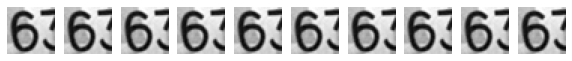

label of each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range (10):

  plt.subplot(1, 10, i+1)

  plt.imshow(X_train[1], cmap = "gray")

  plt.axis('off')

plt.show()

print('label of each of the above image: %s' %(y_train[0:10]))

Data preparation

Print the shape and the array of pixels for the first image in the training dataset

Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.

Normalize the train and the test dataset by dividing by 255.

Print the new shapes of the train and the test dataset.

One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. We are reshapping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

Question 1: Normalize the train and the test data. (2 marks)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255

X_test = X_test / 255

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

Observation:

Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

Model Building

Now that we have done the data preprocessing, let's build an ANN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

Model Architecture

1. Write a function that returns a sequential model with the following architecture:

- First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )

- Second hidden layer with 32 nodes and the relu activation

- Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10

- Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning-rate = 0.001) and metric equal to 'accuracy'. Do not fit the model here, just return the compiled model.

2. Call the nn_model_1 function and store the model in a new variable.

3. Print the summary of the model

4. Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20. Store the model building history to use later for visualization.

Question 2: Build and train an ANN model as per the above mentioned architecture. (10 marks)

In [ ]:

def nn_model_1():
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(64, input_shape=(1024,), activation ='relu'))
  
  # Add layers as per the architecture mentioned above in the same sequence 

  model.add(tf.keras.layers.Dense(32, activation = 'relu'))

  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(loss='çategorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

  return model



In [ ]:
# Build the model

model_1 = nn_model_1()

In [ ]:
# Print summary

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                65600     
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model

model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

history_model_1 =model_1.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 20)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2894 - accuracy: 0.1200 - val_loss: 2.2321 - val_accuracy: 0.1619
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.0826 - accuracy: 0.2501 - val_loss: 1.9088 - val_accuracy: 0.3440
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.7865 - accuracy: 0.3872 - val_loss: 1.6494 - val_accuracy: 0.4575
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 1.5628 - accuracy: 0.4784 - val_loss: 1.4874 - val_accuracy: 0.5004
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4392 - accuracy: 0.5193 - val_loss: 1.3911 - val_accuracy: 0.5442
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.3705 - accuracy: 0.5464 - val_loss: 1.3469 - val_accuracy: 0.5582
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3339 - accuracy: 0.5608 - val_loss: 1.3061 - val_accuracy: 0.5794
Epoch 

Plotting the validation and training accuracies

Q3. Write your observations on the below plot. (2 marks)

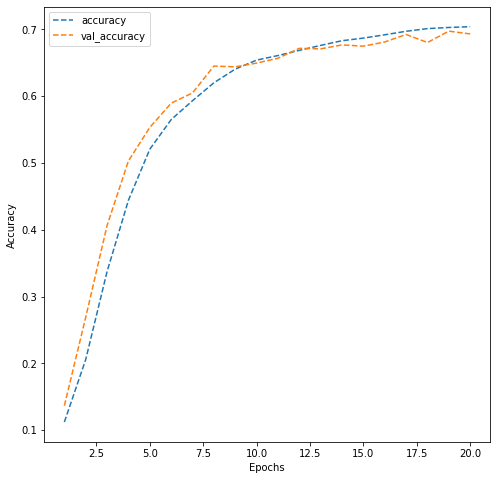

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()


Observation:

The accuracy is the percentage of correctly classified examples in the training set, while the val_accuracy is the percentage of correctly classified examples in the validation set. This means a high percentage score in both is good but a high percentage score in accuracy and low percentage score in val_accuracy is an indication of overfitting.

From the above as epochs increase the accuracy for both training and validation set also increased but the validation set did well than the training set from epoch upwards and even show a slightly higher performance at epoch of 7.5. However, validation performance started dropping beyond this level and at 12.5 epochs validation set stated performaning performing below the training data which shows signs of possible overfitting. Since the validation set recorded the highest performance at around 12 epochs it is recommended that the training stops at that level to avoid overfitting. At that level, accuracy score for both training and validatation set is around 65%.



Let's build one meore model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model history from the keras backend . Also lets fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random numbers generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

Second model Architecture

Write a function that returns a sequential model with the following architecture.

1. First hidden layer with 256 nodes and the relu activation and the input shape = (1024,) 

2. Second hidden layer with 128 nodes and relu activation

3. Add the dropout layer with the rate equal to 0.2

4. Third hidden layer with 64 nodes and relu activation

5. Fourth hidden layer with 64 nodes and relu activation

6. Fifth hidden layer with 32 nodes and relu activation

7. Add the BatchNormalization layer

8. Output layer with activation 'softmax' and number of nodes equal to the number of classes, i.e., 10 - compile the model with the loss equal to the categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to accuracy. Do not fit the model here, just return the compile model.

9. Call the nn_model_2 function and store the model in the new variable

10. Print the summary of the model

11. Fit on the train data with validation split of 0.2 , batch size = 128, verbose = 1, and epochs = 30. Store the model history to use later for visualisation.


Question 4. Build and train the ANN model as per the above mentioned architecture (10 marks)

In [ ]:
# Define the model

def nn_model_2():

  model=tf.keras.Sequential()

  # Add layers as per the architecture mentioned above

  model.add(tf.keras.layers.Dense(units = 256, activation = 'relu', input_shape=(1024,)))
  model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(rate = 0.2))
  model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), metrics=['accuracy'])
  return model


In [ ]:
# Build the model

model_2 = nn_model_2()

In [ ]:
# Print the summary of the model

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
# Fit the model on the train data

history_model_2 = model_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 [==============================] - 3s 8ms/step - loss: 2.3427 - accuracy: 0.1067 - val_loss: 2.2755 - val_accuracy: 0.1338
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.0884 - accuracy: 0.2237 - val_loss: 1.9488 - val_accuracy: 0.3358
Epoch 3/30
263/263 [==============================] - 2s 8ms/step - loss: 1.6737 - accuracy: 0.4104 - val_loss: 1.5640 - val_accuracy: 0.4537
Epoch 4/30
263/263 [==============================] - 2s 8ms/step - loss: 1.4281 - accuracy: 0.5135 - val_loss: 1.2734 - val_accuracy: 0.5836
Epoch 5/30
263/263 [==============================] - 2s 7ms/step - loss: 1.2631 - accuracy: 0.5847 - val_loss: 1.1498 - val_accuracy: 0.6393
Epoch 6/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1554 - accuracy: 0.6279 - val_loss: 1.1232 - val_accuracy: 0.6418
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1012 - accuracy: 0.6503 - val_loss: 1.0485 - val_accuracy: 0.6685
Epoch

Ploting the validation and training accuracies.

Question 5. Write your observation on the below plot. (2 marks)

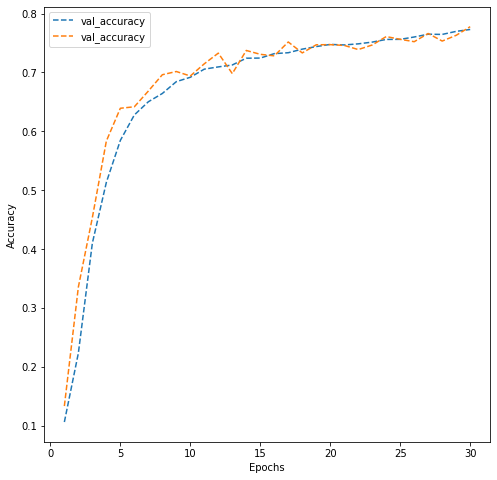

In [ ]:
dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'val_accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()



Observation:

The accuracy performance of both the training and validation sets seem to be performing at the same level with minimum variable between them. At the every epochs through to epoch at 12 the validation set has consistently performan better than the training set in terms of accuracy. However, validation performed below the training set at epochs 13, 18, 23. In all perform level is around 75% for both dataset. 

Predictions on the test data

1. Make predictions on the test data using the second model.

2. Print the obtained result using the classification report and the confusion matrix.

3. Final observations on the obtained result

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


Note: Earlier, we noticed that each entry of the target variable is one-hot encoded vector but each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1814
           1       0.75      0.82      0.78      1828
           2       0.78      0.80      0.79      1803
           3       0.72      0.74      0.73      1719
           4       0.79      0.85      0.82      1812
           5       0.71      0.76      0.74      1768
           6       0.79      0.75      0.77      1832
           7       0.85      0.79      0.82      1808
           8       0.69      0.76      0.73      1812
           9       0.79      0.74      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



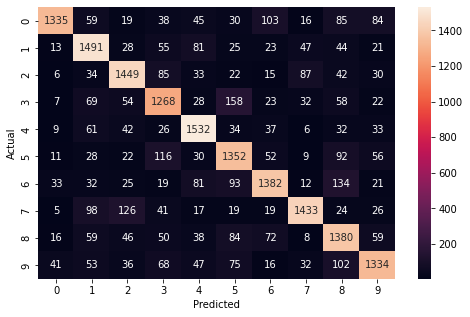

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True, fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Final observation:

Overall, the model looks moderate with accuracy performance of 78%. Precision ranges between 69% to 90%, recall also ranges between 85% and 74% and f1 score is between 82% and 73%. As mentioned above, the performance level of this model is moderate and there is more room for improvement with other modules like convolution neural networks.

The predicts errors among the digits is high for 7, 5, 8 and 6 and this should be improved.